In [9]:
pip install pandas matplotlib seaborn openpyxl


Note: you may need to restart the kernel to use updated packages.


C:\Users\suraj_r3os3ti\AppData\Local\Temp\ipykernel_4544\500228922.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)


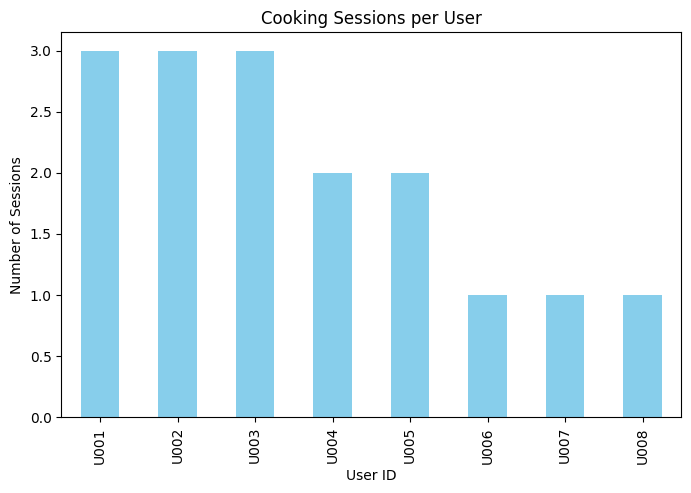

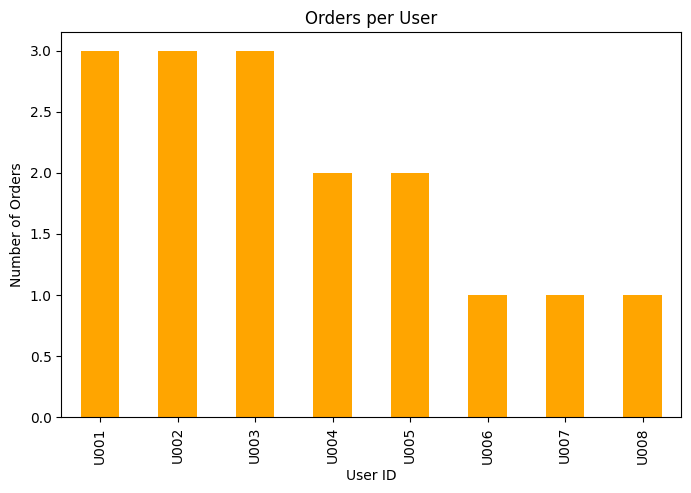

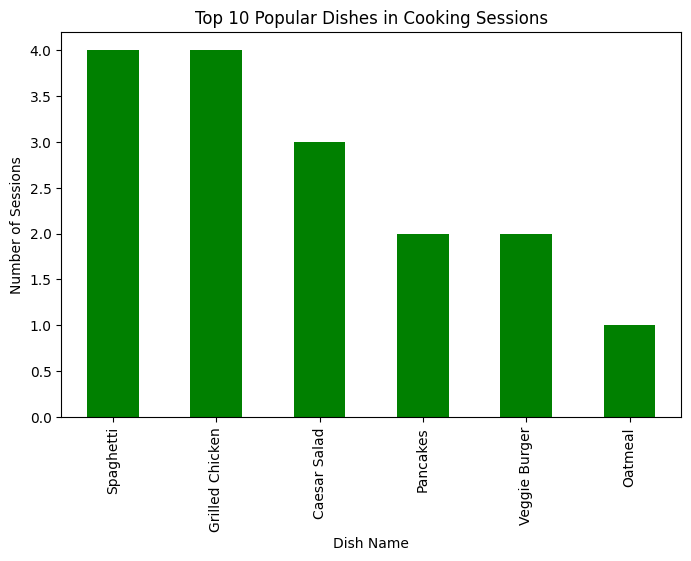

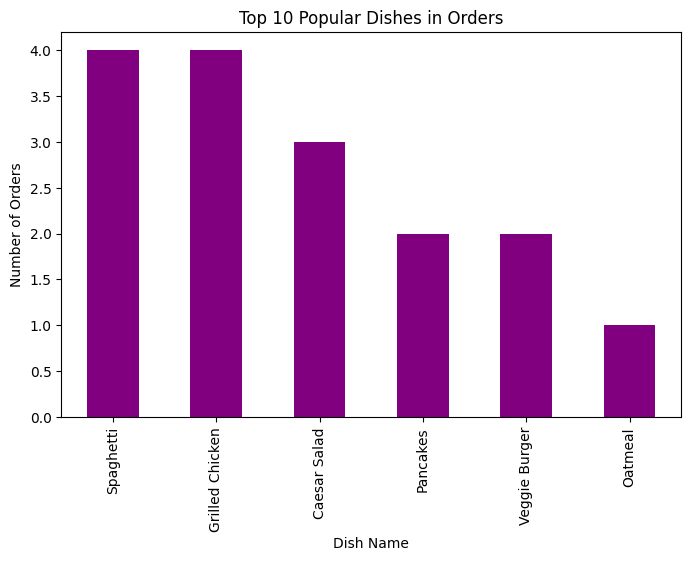

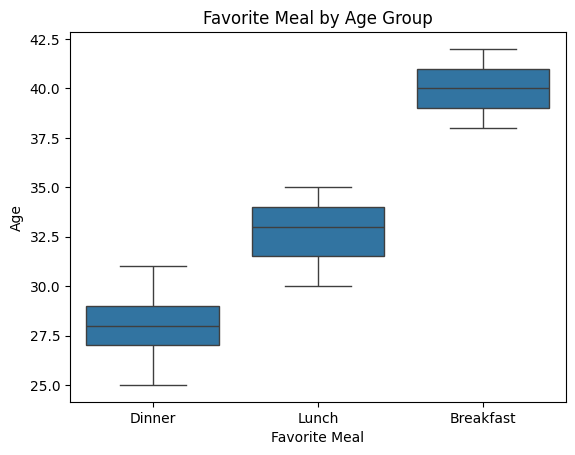

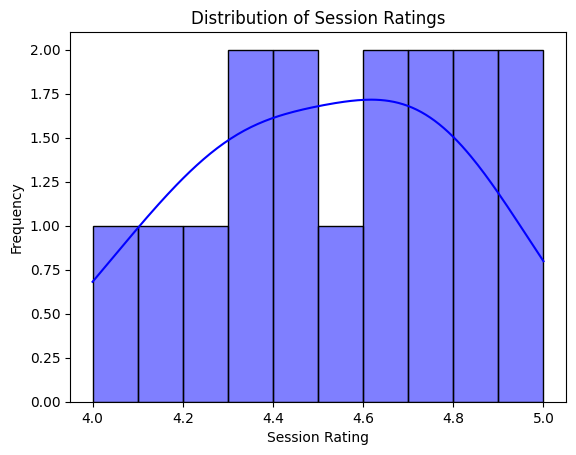

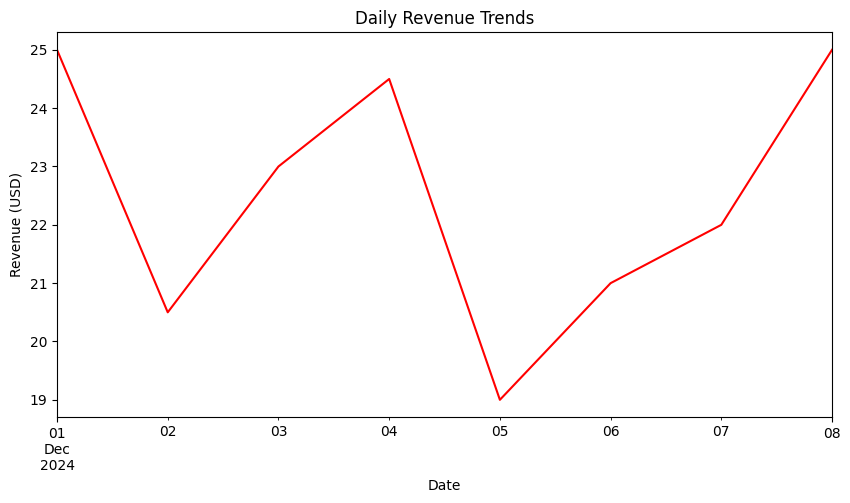

Analysis and visualizations completed. Summary report saved as 'Summary_Report.txt'.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
user_details = pd.read_excel("Data Analyst Intern Assignment - Excel.xlsx", sheet_name="UserDetails.csv")
cooking_sessions = pd.read_excel("Data Analyst Intern Assignment - Excel.xlsx", sheet_name="CookingSessions.csv")
order_details = pd.read_excel("Data Analyst Intern Assignment - Excel.xlsx", sheet_name="OrderDetails.csv")

# Data Cleaning
def clean_data(df):
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    # Handle missing values
    df.fillna("Unknown", inplace=True)
    return df

user_details = clean_data(user_details)
cooking_sessions = clean_data(cooking_sessions)
order_details = clean_data(order_details)

# Analysis 1: Relationship between cooking sessions and user orders
cooking_trend = cooking_sessions["User ID"].value_counts()
order_trend = order_details["User ID"].value_counts()

# Plot Cooking Sessions
plt.figure(figsize=(8, 5))
cooking_trend.plot(kind="bar", color="skyblue")
plt.title("Cooking Sessions per User")
plt.xlabel("User ID")
plt.ylabel("Number of Sessions")
plt.show()

# Plot User Orders
plt.figure(figsize=(8, 5))
order_trend.plot(kind="bar", color="orange")
plt.title("Orders per User")
plt.xlabel("User ID")
plt.ylabel("Number of Orders")
plt.show()

# Analysis 2: Popular Dishes
popular_cooking_dishes = cooking_sessions["Dish Name"].value_counts().head(10)
popular_order_dishes = order_details["Dish Name"].value_counts().head(10)

# Plot Popular Dishes in Cooking Sessions
plt.figure(figsize=(8, 5))
popular_cooking_dishes.plot(kind="bar", color="green")
plt.title("Top 10 Popular Dishes in Cooking Sessions")
plt.xlabel("Dish Name")
plt.ylabel("Number of Sessions")
plt.show()

# Plot Popular Dishes in Orders
plt.figure(figsize=(8, 5))
popular_order_dishes.plot(kind="bar", color="purple")
plt.title("Top 10 Popular Dishes in Orders")
plt.xlabel("Dish Name")
plt.ylabel("Number of Orders")
plt.show()

# Analysis 3: Demographic factors influencing user behavior
sns.boxplot(x="Favorite Meal", y="Age", data=user_details)
plt.title("Favorite Meal by Age Group")
plt.show()

# Analysis 4: Session ratings
sns.histplot(cooking_sessions["Session Rating"], kde=True, color="blue", bins=10)
plt.title("Distribution of Session Ratings")
plt.xlabel("Session Rating")
plt.ylabel("Frequency")
plt.show()

# Revenue Analysis
order_details["Order Date"] = pd.to_datetime(order_details["Order Date"])
revenue_trend = order_details.groupby("Order Date")["Amount (USD)"].sum()

# Plot Revenue Trends
plt.figure(figsize=(10, 5))
revenue_trend.plot(kind="line", color="red")
plt.title("Daily Revenue Trends")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.show()

# Writing a Summary Report
summary = {
    "Top Cooking Dishes": popular_cooking_dishes.to_dict(),
    "Top Ordered Dishes": popular_order_dishes.to_dict(),
    "Top Revenue Day": revenue_trend.idxmax(),
    "Maximum Revenue": revenue_trend.max(),
}
with open("Summary_Report.txt", "w") as file:
    for key, value in summary.items():
        file.write(f"{key}: {value}\n")

print("Analysis and visualizations completed. Summary report saved as 'Summary_Report.txt'.")
